In [ ]:
#a Tensor library with GPU support
import torch

#Datasets, Transforms and Models specific to Computer Vision
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms

#differentiation library that supports all differentiable Tensor operations in torch
from torch.autograd import Variable

#a neural networks library integrated with autograd functionality
import torch.nn as nn
import torch.nn.functional as F

#an optimization package with standard optimization methods such as SGD, RMSProp, LBFGS, Adam etc.
import torch.optim as optim

#scientific computing library for Python
import numpy as np

#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline 
plt.ion() #Turn interactive mode on.

from torch.utils.data import Dataset
from PIL import Image

import pdb

import os
from matplotlib import cm

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
!gdown https://drive.google.com/uc?id=1PXvjq1_Gf_63PU10NiToZ_kRqnfsyGNg

Downloading...
From: https://drive.google.com/uc?id=1PXvjq1_Gf_63PU10NiToZ_kRqnfsyGNg
To: /content/cifar-100-python.tar.gz
100% 169M/169M [00:03<00:00, 53.2MB/s]


In [ ]:
!ls -lh

total 162M
-rw-r--r-- 1 root root 162M Oct 18 06:04 cifar-100-python.tar.gz
drwxr-xr-x 1 root root 4.0K Oct 14 19:05 sample_data


In [ ]:
!tar xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [ ]:
# Python fuction to read dataset as described on CIFAR 10 website
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
metaData = unpickle('cifar-100-python/meta')#metaData
print("Fine labels:", metaData[b'fine_label_names'], "\n")

print(metaData[b'fine_label_names'][16:26])

Fine labels: [b'apple', b'aquarium_fish', b'baby', b'bear', b'beaver', b'bed', b'bee', b'beetle', b'bicycle', b'bottle', b'bowl', b'boy', b'bridge', b'bus', b'butterfly', b'camel', b'can', b'castle', b'caterpillar', b'cattle', b'chair', b'chimpanzee', b'clock', b'cloud', b'cockroach', b'couch', b'crab', b'crocodile', b'cup', b'dinosaur', b'dolphin', b'elephant', b'flatfish', b'forest', b'fox', b'girl', b'hamster', b'house', b'kangaroo', b'keyboard', b'lamp', b'lawn_mower', b'leopard', b'lion', b'lizard', b'lobster', b'man', b'maple_tree', b'motorcycle', b'mountain', b'mouse', b'mushroom', b'oak_tree', b'orange', b'orchid', b'otter', b'palm_tree', b'pear', b'pickup_truck', b'pine_tree', b'plain', b'plate', b'poppy', b'porcupine', b'possum', b'rabbit', b'raccoon', b'ray', b'road', b'rocket', b'rose', b'sea', b'seal', b'shark', b'shrew', b'skunk', b'skyscraper', b'snail', b'snake', b'spider', b'squirrel', b'streetcar', b'sunflower', b'sweet_pepper', b'table', b'tank', b'telephone', b'tele

In [ ]:
class CustomDataset(Dataset):
    

    def __init__(self, root, train=True, transform=None):
        self.root = root
        self.transform = transform
        self.train = train

        self.load_data()

    def load_data(self):
        
        # directory_str = "/content/cifar-100-batches-py"
        directory = os.fsencode(self.root)

        images = []
        labels = []

        for file in os.listdir(directory):
            filename = os.fsdecode(file)


            if filename.endswith(".asm") or filename.endswith(".py"): 
                # print(os.path.join(directory, filename))
                continue
            else:
                # train = False
                dataPath = self.root+'/'+filename
                # print(dataPath)
                if self.train==True and filename =="train":
                  # print("t>>" + dataPath)  
                  images_dict = unpickle(dataPath)
                  
                  # n_iter = 2

                  for k in range(0,len(images_dict[b'data'])):
                    # if(n_iter>0):
                      # print(k)
                      if int(images_dict[b'fine_labels'][k] )<=25 and int(images_dict[b'fine_labels'][k] )>=16:

                        img_R = images_dict[b'data'][k][0:1024].reshape((32, 32))
                        img_G = images_dict[b'data'][k][1024:2048].reshape((32, 32))
                        img_B = images_dict[b'data'][k][2048:3072].reshape((32, 32))
                        img = np.dstack((img_R, img_G, img_B))
                        # plt.figure()
                        img = transforms.ToPILImage()(img )                      
                        # transforms.ToPILImage(img)    
                        images.append(img)

                        
                        labels.append( int(images_dict[b'fine_labels'][k] )  - 16 )
                        
                      # images.append(transforms.ToPILImage(img))

                      # plt.imshow(img)
                      # n_iter-=1

                    # else:
                      # break
                  
                  # n_iter = 2
                  # for k in range(0,len(images_dict[b'labels'])):
                    # if(n_iter>0):
                      # print(k)
                      # n_iter-=1
                      
                    
                    # else:
                      # break
                    
            
                  # continue

                elif self.train==False and filename =="test":

                  # print("t>>" + dataPath)  
                  images_dict = unpickle(dataPath)
                  
                  # n_iter = 5

                  for k in range(0,len(images_dict[b'data'])):
                    # if(n_iter>0):
                      # print(k)
                      if int(images_dict[b'fine_labels'][k] )<=25 and int(images_dict[b'fine_labels'][k] )>=16:

                        img_R = images_dict[b'data'][k][0:1024].reshape((32, 32))
                        img_G = images_dict[b'data'][k][1024:2048].reshape((32, 32))
                        img_B = images_dict[b'data'][k][2048:3072].reshape((32, 32))
                        img = np.dstack((img_R, img_G, img_B))
                        # plt.figure()

                        # plt.imshow(img)
                        # n_iter-=1
                        img = transforms.ToPILImage()(img )
                        # transforms.ToPILImage(img)    
                        images.append(img)
                        labels.append( int(images_dict[b'fine_labels'][k] ) - 16 )

                      # else:
                        # break
                    
                    # n_iter = 5
                  # for k in images_dict[b'labels']:
                    #if(n_iter>0):
                      # print(k)
                    #  n_iter-=1
                    

                    #else:
                     # break

        self.images = images
        self.labels = labels  



    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        # img=Image.open(self.root+'/'+sample)
        target = torch.tensor(int(self.labels[idx]))
       
                                                                                                                                                  
        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [ ]:
'''
directory_str = "/content/cifar-10-batches-py"
directory = os.fsencode(directory_str)
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".asm") or filename.endswith(".py"): 
         # print(os.path.join(directory, filename))
         continue
    else:
        train = False
        dataPath = directory_str+'/'+filename
        print(dataPath)
        if train and filename.split('_')[0]=="data":
          print("t>>" + dataPath)  
          images_dict = unpickle(dataPath)
          
          n_iter = 2

          for k in images_dict[b'data']:
            if(n_iter>0):
              # print(k)
              img_R = k[0:1024].reshape((32, 32))
              img_G = k[1024:2048].reshape((32, 32))
              img_B = k[2048:3072].reshape((32, 32))
              img = np.dstack((img_R, img_G, img_B))
              tmp_img =  Image.fromarray(np.uint8(cm.gist_earth(img)*255))    
              # images.append(tmp_img)
              plt.figure()

              plt.imshow(tmp_img)
              n_iter-=1

            else:
              break
          
          n_iter = 2
          for k in images_dict[b'labels']:
            if(n_iter>0):
              print(k)
              n_iter-=1
              
            else:
              break
            
    
          continue

        elif train==False and filename.split('_')[0]=="test":

          print("t>>" + dataPath)  
          images_dict = unpickle(dataPath)
          
          n_iter = 5

          for k in images_dict[b'data']:
            if(n_iter>0):
              # print(k)
              img_R = k[0:1024].reshape((32, 32))
              img_G = k[1024:2048].reshape((32, 32))
              img_B = k[2048:3072].reshape((32, 32))
              img = np.dstack((img_R, img_G, img_B))
              
              tmp_img =  Image.fromarray(np.uint8(cm.gist_earth(img)*255))    
              # images.append(tmp_img)
              plt.figure()
              plt.imshow(tmp_img)
              n_iter-=1

            else:
              break
          
          n_iter = 5
          for k in images_dict[b'labels']:
            if(n_iter>0):
              print(k)
              n_iter-=1
              
            else:
              break
'''

'\ndirectory_str = "/content/cifar-10-batches-py"\ndirectory = os.fsencode(directory_str)\n    \nfor file in os.listdir(directory):\n    filename = os.fsdecode(file)\n    if filename.endswith(".asm") or filename.endswith(".py"): \n         # print(os.path.join(directory, filename))\n         continue\n    else:\n        train = False\n        dataPath = directory_str+\'/\'+filename\n        print(dataPath)\n        if train and filename.split(\'_\')[0]=="data":\n          print("t>>" + dataPath)  \n          images_dict = unpickle(dataPath)\n          \n          n_iter = 2\n\n          for k in images_dict[b\'data\']:\n            if(n_iter>0):\n              # print(k)\n              img_R = k[0:1024].reshape((32, 32))\n              img_G = k[1024:2048].reshape((32, 32))\n              img_B = k[2048:3072].reshape((32, 32))\n              img = np.dstack((img_R, img_G, img_B))\n              tmp_img =  Image.fromarray(np.uint8(cm.gist_earth(img)*255))    \n              # images.app

In [ ]:
train_ds = CustomDataset( "/content/cifar-100-python" ,transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ]) )

In [ ]:
trainloader = torch.utils.data.DataLoader(train_ds, batch_size=4,
                                          shuffle=True, num_workers=2)

tensor([7, 3, 1, 3])


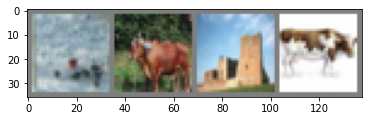

In [ ]:
import torchvision
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

In [ ]:
test_ds  = CustomDataset("/content/cifar-100-python", train = False, transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  ] ) )

In [ ]:
testloader  = torch.utils.data.DataLoader(test_ds , batch_size=4,
                                          shuffle=True, num_workers=2)

tensor([8, 0, 5, 1])


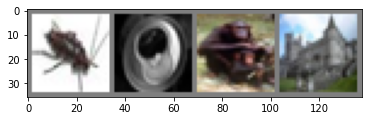

In [ ]:
# import torchvision
dataiter = iter(testloader )
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
#print labels
print(labels)

In [ ]:
import pdb
class Net2D (nn.Module):
    
    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(Net2D , self).__init__()
        
        #calling conv3d module for convolution
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 50, kernel_size = 2, stride = 1)

        # self.conv1_2 = nn.Conv3d(in_channels = n_frames, out_channels = 50, kernel_size = 2, stride = 1)
        
        #calling MaxPool3d module for max pooling with downsampling of 2
        self.pool1 = nn.MaxPool2d(kernel_size= 2 , stride=2)

        # self.pool1_2 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=2)

        self.conv2 =  nn.Conv2d(in_channels = 50, out_channels = 100, kernel_size = 3, stride = 1)

        self.pool2 = nn.MaxPool2d(kernel_size= 3 , stride=2)

        # self.conv2_2 =  nn.Conv3d(in_channels = 50, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        # self.pool2_2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)


        # self.conv3  =  nn.Conv2d(in_channels = 100, out_channels = 200, kernel_size = 3 , stride = 1)

        # self.pool3  = nn.MaxPool2d(kernel_size= 3 , stride=2)

        # self.conv3_2 =  nn.Conv3d(in_channels = 100, out_channels = 100, kernel_size = (1, 3, 3), stride = 1)

        # self.pool3_2 = nn.MaxPool3d(kernel_size=(1, 3, 3), stride=2)



        # self.conv2_1 =  nn.Conv2d(in_channels = 50, out_channels = 100, kernel_size = ( 3, 3), stride = 1)

        # self.conv2_2 =  nn.Conv2d(in_channels = 50, out_channels = 100, kernel_size = ( 3, 3), stride = 1)

        # self.pool2_1 = nn.MaxPool2d(kernel_size=( 3, 3), stride=2)

        # self.pool2_2 = nn.MaxPool2d(kernel_size=( 3, 3), stride=2)

        
        
        #fully connected layer
        self.fc1 = nn.Linear(3600, 1200)
        self.fc2 = nn.Linear(1200, 400)
        self.fc2_5 = nn.Linear(400, 36)

        
        self.fc3_0 = nn.Linear(36, 10)
        self.fc3_1 = nn.Linear(36, 10)
        self.fc3_2 = nn.Linear(36, 10)
        self.fc3_3 = nn.Linear(36, 10)
        self.fc3_4 = nn.Linear(36, 10)

        
    
    #defining the structure of the network
    def forward(self, x ):

        x1 = self.pool1 (F.relu(self.conv1 (x)))

        # x2 = self.pool1_2(F.relu(self.conv1_2(y)))

        x1 = self.pool2 (F.relu(self.conv2 (x1)))

        # x2 = self.pool2_2(F.relu(self.conv2_2(x2)))


        # x1 = self.pool3 (F.relu(self.conv3 (x1)))

        # x2 = self.pool3_2(F.relu(self.conv3_2(x2)))

        # x1 = self.pool4_1(F.relu(self.conv4_1(x1)))

        # x2 = self.pool4_2(F.relu(self.conv4_2(x2)))


        # x = torch.cat((x1 ,x2 ),dim=1)

        tmp = 1
        for i in range(1,len(x1.shape))  :
          tmp*=x1.shape[i]

        # print(x1.shape)


        x = x1.view(-1, tmp)

        x = self.fc1(F.relu(x))
        
        x = self.fc2(F.relu(x))
        
        x = self.fc2_5(F.relu(x))

        x0 = self.fc3_0(F.relu(x))
        x1 = self.fc3_1(F.relu(x))
        x2 = self.fc3_2(F.relu(x))
        x3 = self.fc3_3(F.relu(x))
        x4 = self.fc3_4(F.relu(x))
        
        # x = torch.sigmoid(x)

        '''
        
        #Applying relu activation after each conv layer
        x = self.pool1(F.relu(self.conv1(x)))
        x = x.view(-1,50,31,31)
        # pdb.set_trace()
        x = self.pool2(F.relu(self.conv2(x)))
        

        x = torch.cat((x11,x12,x13,x21,x22,x23, x31,x32,x33 ),dim=1)
        
        #reshaping to 1d for giving input to fully connected units
        x = x.view(-1, 19600)
        
        x = self.fc1(F.relu(x))
        
        '''

        return [x0, x1, x2, x3, x4]

fixed_model_2d = Net2D()# .cuda()   #Use .cuda()

#Printing the network architecture
print(fixed_model_2d )


Net2D(
  (conv1): Conv2d(3, 50, kernel_size=(2, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3600, out_features=1200, bias=True)
  (fc2): Linear(in_features=1200, out_features=400, bias=True)
  (fc2_5): Linear(in_features=400, out_features=36, bias=True)
  (fc3_0): Linear(in_features=36, out_features=10, bias=True)
  (fc3_1): Linear(in_features=36, out_features=10, bias=True)
  (fc3_2): Linear(in_features=36, out_features=10, bias=True)
  (fc3_3): Linear(in_features=36, out_features=10, bias=True)
  (fc3_4): Linear(in_features=36, out_features=10, bias=True)
)


# **TRAIN BEGINS**

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_2d.parameters(), lr=0.0005, momentum=0.9)

#criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(fixed_model_2d.parameters(), lr=0.0003, momentum=0.9)

Model #0:  [1,   300] loss: 2.303
Model #0:  [1,   300] Accuracy: 0.105
Model #1:  [1,   300] loss: 2.304
Model #1:  [1,   300] Accuracy: 0.105
Model #2:  [1,   300] loss: 2.305
Model #2:  [1,   300] Accuracy: 0.094
Model #3:  [1,   300] loss: 2.302
Model #3:  [1,   300] Accuracy: 0.107
Model #4:  [1,   300] loss: 2.305
Model #4:  [1,   300] Accuracy: 0.098
Model #0:  [1,   600] loss: 2.291
Model #0:  [1,   600] Accuracy: 0.116
Model #1:  [1,   600] loss: 2.294
Model #1:  [1,   600] Accuracy: 0.142
Model #2:  [1,   600] loss: 2.294
Model #2:  [1,   600] Accuracy: 0.116
Model #3:  [1,   600] loss: 2.292
Model #3:  [1,   600] Accuracy: 0.129
Model #4:  [1,   600] loss: 2.298
Model #4:  [1,   600] Accuracy: 0.104
Model #0:  [1,   900] loss: 2.208
Model #0:  [1,   900] Accuracy: 0.172
Model #1:  [1,   900] loss: 2.209
Model #1:  [1,   900] Accuracy: 0.184
Model #2:  [1,   900] loss: 2.212
Model #2:  [1,   900] Accuracy: 0.169
Model #3:  [1,   900] loss: 2.198
Model #3:  [1,   900] Accuracy

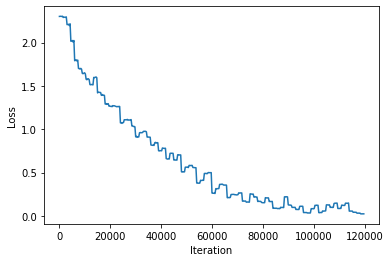

Finished Training


In [ ]:
plotIter = 300
plotIterCntr = 0
numEpochs = 20

total = 0
correct = 0

trainLoss = np.zeros((plotIter*numEpochs,1))
trainAcc = np.zeros((plotIter*numEpochs,1))
trainIter = np.arange(plotIter*numEpochs)


trainLoss_arr = [trainLoss]*5
trainAcc_arr = [trainAcc]*5


#Transferring the model to GPU

fixed_model_2d.cuda()
correct_counts = [0 ]*5
total_counts = [0 ]*5
    

for epoch in range(numEpochs):  # loop over the dataset multiple times

    running_losses = [0.0]*5
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda() ), Variable(labels.cuda()) # use .cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = fixed_model_2d(inputs)
        
        # pdb.set_trace()
        losses = []

        loss = 0
        for res in outputs:

          currLoss = criterion(res, labels)
          # print(currLoss)
          losses.append(currLoss)
          loss += currLoss
        
        loss.backward()
        optimizer.step()

        
          
        # print statistics
        for id in range(0,5):

          running_losses[id] += losses[id].data.item()
          if i % plotIter == plotIter-1:    # print every plotIter mini-batches
              trainLoss_arr[id][plotIterCntr] = running_losses[id] / plotIter
              # plotIterCntr+=1
              
              print("Model #"+str(id)+": ", '[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_losses[id] / plotIter))
              running_losses[id] = 0.0
          

          _, predicted = torch.max(outputs[id].data, 1)
          correct_counts[id] += (predicted == labels).sum()
          total_counts[id]  += labels.size(0)

          if i % plotIter == plotIter-1:    # print every plotIter mini-batches
              
              trainAcc_arr[id][plotIterCntr] = correct_counts[id].cpu() / total_counts[id] 
              plotIterCntr+=1
              
              print("Model #"+str(id)+": ", '[%d, %5d] Accuracy: %.3f' %
                    (epoch + 1, i + 1, correct_counts[id] / total_counts[id]))
              
              correct_counts[id] = 0
              total_counts[id] = 0

#Plotting the training graph
plt.plot(np.arange(plotIterCntr)*plotIter,trainLoss_arr[0][0:plotIterCntr], label="train")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

print('Finished Training')

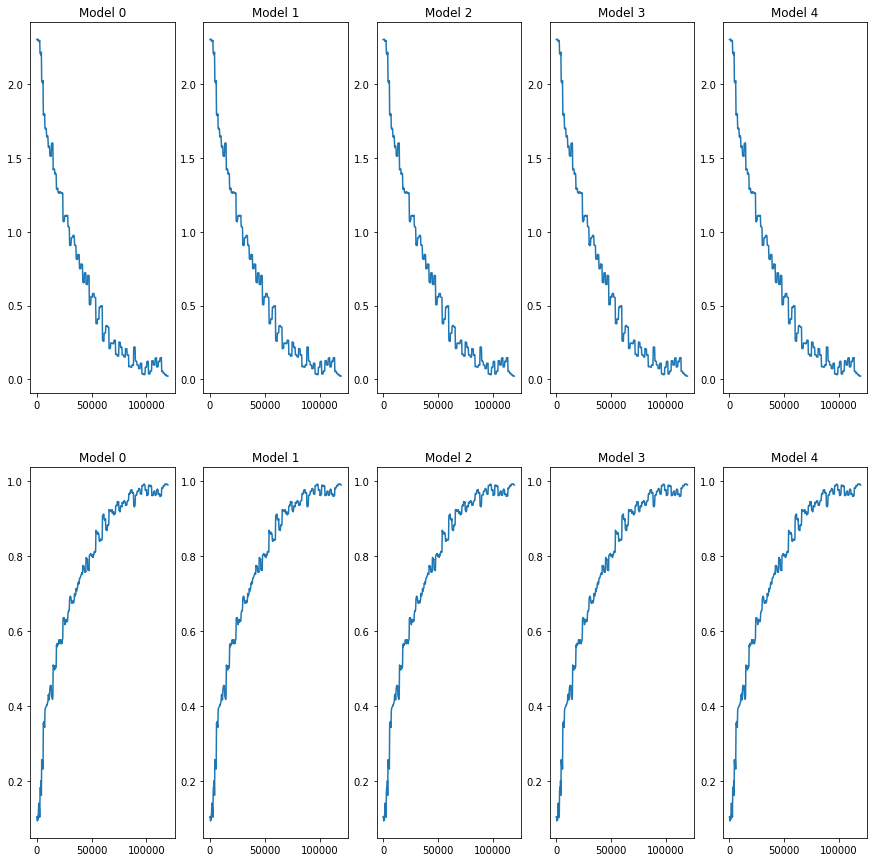

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math


# fig = plt.figure(figsize=(10, 7))
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 5, figsize=(15, 15))



for i in range(0,2):
  for j in range(0,5):
    # For Sine Function
    if i==0:
      axis[i, j].plot(np.arange(plotIterCntr)*plotIter,trainLoss_arr[j][0:plotIterCntr], label="train")
      axis[i, j].set_title("Model "+str(j))
    else:
      axis[i, j].plot(np.arange(plotIterCntr)*plotIter,trainAcc_arr[j][0:plotIterCntr], label="train")
      axis[i, j].set_title("Model "+str(j))
    


# Combine all the operations and display
plt.show()


In [ ]:
## Prediction of accuracy
correct_counts  = [0]*5
total_counts  = [0]*5

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = fixed_model_2d(Variable(images.cuda()))
    
    for id in range(0,5):
      _, predicted = torch.max(outputs[id].data, 1)
      total_counts[id]  += labels.size(0)

      labels = labels.cuda()
      correct_counts[id] += (predicted == labels).sum()
      
      

for id in range(0,5):
  print('Accuracy of the model:'+str(id) + ' on the test images: %d %%' % (
      100 * correct_counts[id] / total_counts[id]))


Accuracy of the model:0 on the test images: 76 %
Accuracy of the model:1 on the test images: 77 %
Accuracy of the model:2 on the test images: 76 %
Accuracy of the model:3 on the test images: 76 %
Accuracy of the model:4 on the test images: 76 %


In [ ]:
## Prediction of accuracy for ensemble
correct_count  = 0
total_count  = 0

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    outputs = fixed_model_2d(Variable(images.cuda()))
    
    sum = (outputs[0]+outputs[1]+outputs[2]+outputs[3]+outputs[4])/5.0

    # for res in outputs:
    #  for i in range(0,len(res)):
    #    print(res[i],end=" ")
    #  print()
    
    # print(sum)

    # break

    # for id in range(0,5):
    
    _, predicted = torch.max(sum.data, 1)
    total_count += labels.size(0)

    labels = labels.cuda()
    correct_count += (predicted == labels).sum()
      
      

# for id in range(0,5):
print('Accuracy of the ensemble model on the test images: %d %%' % (
      100 * correct_count  / total_count ))


Accuracy of the ensemble model on the test images: 76 %


In [ ]:
weights= []
for hj in fixed_model_2d.parameters():
  weights.append(hj.data)

import pickle
pickle.dump(weights,open('model_mid_lr_0_0005_20_epoch_trial_2.pkl','wb')) 

# **TRAIN** **ENDS**

In [ ]:
import io
import pickle
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)


In [ ]:
weights = CPU_Unpickler(open('model_mid_lr_0_0005_20_epoch_trial_2.pkl','rb')).load()

fixed_model_2d_loaded = Net2D()

cnt=0
for ijk in fixed_model_2d_loaded.parameters():
  ijk.data = weights[cnt]
  cnt+=1


In [ ]:
## Prediction of accuracy
correct_counts  = [0]*5
total_counts  = [0]*5

#Iterating over the batches returned from testloader
for data in testloader:
    images, labels = data
    print(images.shape)
    outputs = fixed_model_2d_loaded(Variable(images ))
    
    for id in range(0,5):
      _, predicted = torch.max(outputs[id].data, 1)
      total_counts[id]  += labels.size(0)

      labels = labels 
      correct_counts[id] += (predicted == labels).sum()
      
      

for id in range(0,5):
  print('Accuracy of the model:'+str(id) + ' on the test images: %d %%' % (
      100 * correct_counts[id] / total_counts[id]))


torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
t

In [ ]:
for data in testloader:
    images, labels = data
    # print(images .shape)
    # print(images[0].view(-1, 3,32,32) .shape)
    
    outputs1 = fixed_model_2d_loaded(Variable(images[0].view(-1, 3,32,32)))
    outputs2 = fixed_model_2d_loaded(Variable(images ) )
    
    print("mm",outputs1)
    print("kk",outputs2)

    break 

mm [tensor([[  6.3209,  -5.6410,  23.0035,  -3.2424,  -5.0030,  -2.1237,   5.6409,
          -5.2576,  -2.8865, -15.0850]], grad_fn=<AddmmBackward0>), tensor([[  8.1632,  -3.0023,  25.7006,  -1.0689,  -2.7173,   0.4603,   8.3701,
          -2.2409,   0.5101, -11.9321]], grad_fn=<AddmmBackward0>), tensor([[  6.7142,  -7.8223,  23.7169,  -2.8776,  -5.0501,  -1.7300,   5.5744,
          -4.0721,  -1.8972, -14.5765]], grad_fn=<AddmmBackward0>), tensor([[  6.9741,  -6.4224,  23.9364,  -2.2576,  -4.1662,  -1.3047,   6.8300,
          -4.4914,  -1.3716, -12.7622]], grad_fn=<AddmmBackward0>), tensor([[  7.0667,  -5.7414,  23.1883,  -2.5724,  -4.7649,  -1.3803,   6.1117,
          -3.0008,  -0.9304, -14.0110]], grad_fn=<AddmmBackward0>)]
kk [tensor([[  6.3209,  -5.6410,  23.0035,  -3.2424,  -5.0030,  -2.1237,   5.6409,
          -5.2576,  -2.8865, -15.0850],
        [  4.8328,  -4.0316,   2.3661,  -2.3436,   2.1753,  -3.1396,   2.9061,
          -1.2250,  -2.1563,   2.5817],
        [ -0.4242, 

In [ ]:
len(train_ds)

for i in train_ds:
  print( int(i[1]) )

3
7
1
1
5
6
8
4
2
7
2
4
4
3
5
3
5
3
5
6
9
7
7
2
7
3
4
7
3
5
4
2
5
8
6
3
2
2
7
9
4
8
7
1
4
6
1
3
7
7
0
0
6
4
7
9
3
3
9
0
1
8
9
6
3
4
5
6
0
3
2
3
6
1
7
8
4
0
8
6
2
8
7
4
2
2
3
5
8
8
1
8
8
8
3
3
8
7
4
2
0
9
2
3
5
1
0
5
5
3
9
8
9
5
4
9
4
8
0
4
1
6
1
2
8
3
9
7
9
8
4
8
9
8
9
1
5
8
7
2
8
1
8
9
5
7
5
8
7
1
0
0
0
4
0
7
0
5
1
4
3
4
0
3
6
2
8
2
0
5
8
9
3
9
5
8
1
5
0
9
1
2
0
4
9
5
7
6
4
9
7
8
2
5
6
6
1
5
3
6
5
7
7
6
4
1
5
8
5
3
7
4
5
3
7
2
2
9
3
8
5
6
4
2
5
2
2
9
6
4
2
4
7
7
0
4
0
4
4
0
2
0
8
9
2
4
5
3
5
4
6
4
9
3
5
2
1
6
9
2
2
2
6
2
1
0
7
0
7
0
0
0
6
4
9
7
5
3
1
5
6
2
4
4
8
4
4
3
7
2
3
7
8
5
7
6
2
8
0
6
0
3
4
4
1
3
1
6
6
1
8
8
5
6
7
0
2
9
2
1
9
5
3
0
3
9
9
9
7
5
0
3
8
8
3
5
5
0
0
4
9
3
6
9
1
7
0
1
5
8
1
6
8
6
0
6
5
8
9
7
3
0
3
5
2
3
3
6
1
0
9
4
1
6
7
7
8
8
5
3
3
8
8
3
5
2
2
3
7
7
5
2
8
7
9
9
9
0
0
5
6
5
0
0
9
0
9
3
4
1
3
1
2
5
0
4
0
3
2
6
4
9
8
9
0
6
4
1
8
2
5
4
9
4
2
9
2
6
5
0
6
5
4
4
9
0
3
9
8
6
6
3
7
0
6
1
0
4
3
4
0
9
8
5
8
1
2
4
8
8
6
6
5
9
4
0
2
2
9
2
4
6
5
8
4
0
5
6
8
9
9
9
5
3
3
4
6
9
6
7


In [ ]:
train_outputs=[]

for data in train_ds:
    # images, labels = data
    # print(images .shape)
    # print(images[0].view(-1, 3,32,32) .shape)
    
    outputs1 = fixed_model_2d_loaded(Variable(data[0].view(-1, 3,32,32)))
    # outputs2 = fixed_model_2d_loaded(Variable(images ) )
    
    train_outputs.append(outputs1)
    # print("mm",outputs1)
    # print("kk",outputs2)

    # break 

## **Finding Similar Images Section**

For Individual Model

In [ ]:
# ttl1+=1
test_image = test_ds[11]
actual_class = test_image[1]

good = 0
bad = 0

outputs1 = fixed_model_2d_loaded(Variable(test_image[0].view(-1, 3,32,32)))  
distances =  [ [] for _ in range(5) ]
similars = [ [] for _ in range(5) ]

idx = 0

for i in range(0,len(train_outputs)):
  

  for model_ind in range(0,5):
    dist = np.linalg.norm(outputs1[model_ind].detach().numpy()- train_outputs[i][model_ind].detach().numpy())
    distances[model_ind].append( [dist,idx] )
  idx+=1

for model_ind in range(0,5):

  distances[model_ind] = sorted(distances[model_ind], key=lambda x: x[0])
  # print(distances)
  AP = 0
  match = 0
  totl = 0
  

  for nums in range(0,5):
    # print(int( train_ds[ int(distances[model_ind][nums][1]) ][1] ), int(data[1]))
    totl+=1
    # print(int(distances[model_ind][nums][1]))
    similars[model_ind].append(train_ds[int(distances[model_ind][nums][1])])
  

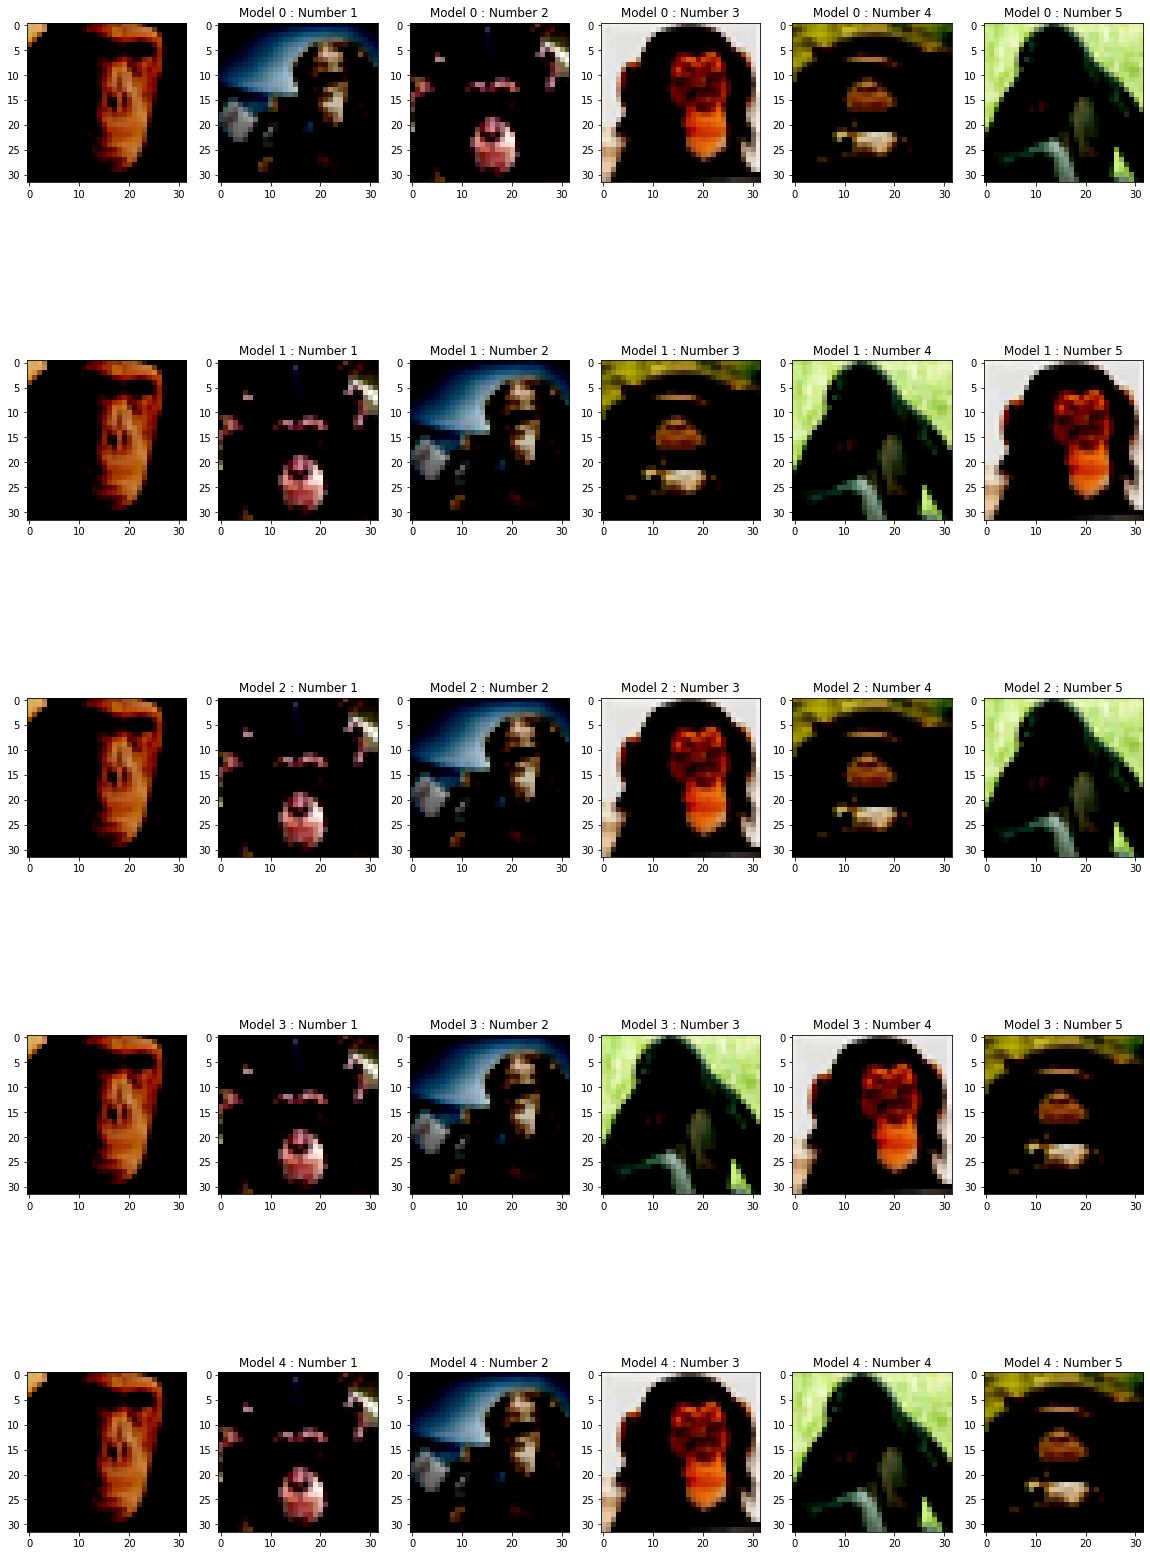

In [ ]:
figure, axis = plt.subplots(5, 6, figsize=(20, 30))

for model in range(0,5):
  for i in range(0,6):
    if(i==0):
      axis[model, i].imshow( torch.permute(test_image[0], (1, 2, 0))  );
      # test_image[0]
      
    else:
      # print( similars[i-1][0] )
      axis[model, i].imshow( torch.permute( similars[model][i-1][0] , (1, 2, 0))   );
      axis[model, i].set_title("Model "+str(model)+" : "+ "Number "+str(i))

For Ensemble

In [ ]:
# ttl1+=1
test_image = test_ds[11]
actual_class = test_image[1]

good = 0
bad = 0

outputs1 = fixed_model_2d_loaded(Variable(test_image[0].view(-1, 3,32,32)))  
outputs1 = (outputs1[0]+outputs1[1]+outputs1[2]+outputs1[3]+outputs1[4])/5.0

distances =  [  ]
similars = [ ]

idx = 0

for i in range(0,len(train_outputs)):
  
  tmp = (train_outputs[i][0] + train_outputs[i][1]+train_outputs[i][2]+train_outputs[i][3]+train_outputs[i][4 ])/5.0

  dist = np.linalg.norm(outputs1.detach().numpy()- tmp.detach().numpy())
    
  # for model_ind in range(0,5):
  # dist = np.linalg.norm(outputs1 .detach().numpy()- train_outputs[i] .detach().numpy())
  distances .append( [dist,idx] )
  idx+=1


distances = sorted(distances , key=lambda x: x[0])
# print(distances)
AP = 0
match = 0
totl = 0
  

for nums in range(0,5):
    # print(int( train_ds[ int(distances[model_ind][nums][1]) ][1] ), int(data[1]))
    totl+=1
    # print(int(distances[model_ind][nums][1]))
    similars .append(train_ds[int(distances [nums][1])])
  

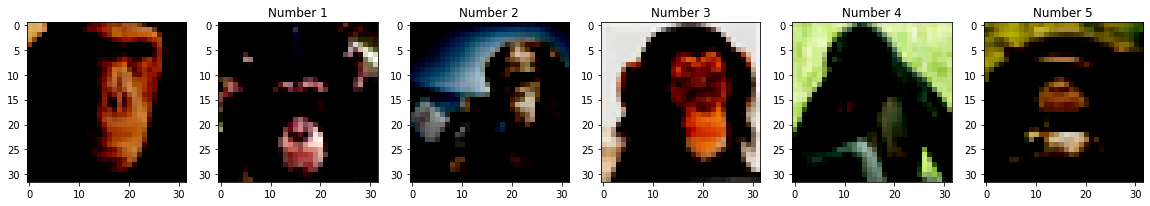

In [ ]:
figure, axis = plt.subplots(1, 6, figsize=(20, 30))

# for model in range(0,5):
for i in range(0,6):
  if(i==0):
    axis[ i].imshow( torch.permute(test_image[0], (1, 2, 0))  );
    # test_image[0]
    
  else:
    # print( similars[i-1][0] )
    axis[ i].imshow( torch.permute( similars [i-1][0] , (1, 2, 0))   );
    axis[ i].set_title(  "Number "+str(i))

# **MAP Score Section**

1. Individual Models

In [ ]:
MAPs = [0.0]*5
ttl1 = 0

good = 0
bad = 0

for data in test_ds:
  ttl1+=1
  actual_class = data[1]

  outputs1 = fixed_model_2d_loaded(Variable(data[0].view(-1, 3,32,32)))  
  distances =  [ [] for _ in range(5) ]

  idx = 0
  
  for i in range(0,len(train_outputs)):
    

    for model_ind in range(0,5):
      dist = np.linalg.norm(outputs1[model_ind].detach().numpy()- train_outputs[i][model_ind].detach().numpy())
      distances[model_ind].append( [dist,idx] )
    idx+=1

  for model_ind in range(0,5):
      distances[model_ind] = sorted(distances[model_ind], key=lambda x: x[0])
      # print(distances)
      AP = 0
      match = 0
      totl = 0
      for nums in range(0,5):
        # print(int( train_ds[ int(distances[model_ind][nums][1]) ][1] ), int(data[1]))
        totl+=1
        if ( nums==0 and int( train_ds[int(distances[model_ind][nums][1])][1] ) == int(data[1]) ):
          good+=1
        elif(nums==0):
          bad+=1

        if int( train_ds[int(distances[model_ind][nums][1])][1] ) == int(data[1]):
          print("+1")
          match+=1 
          AP += (match/totl)
        else :
          print("-1")
        
        
      if(match!=0):
        # good+=1
        AP/=match
      else:
        # bad+=1
        AP = 0
      MAPs[model_ind]+=AP


Streaming output truncated to the last 5000 lines.
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-

In [ ]:
np.array(MAPs)/ttl1

array([0.78600556, 0.78892917, 0.78928056, 0.78913472, 0.78790417])

In [ ]:
print(good, bad)
print(good/(good+bad))

3872 1128
0.7744


In [ ]:
'''tpttl = 1000

for data in test_ds:
  if tpttl<0:
    break
  tpttl-=1
  outputs = fixed_model_2d_loaded(Variable(data[0].view(-1, 3,32,32)))
  for model_ind in range(0,5):
      _, predicted = torch.max(outputs[id].data, 1)
      print( int(predicted)==int(data[1]))
'''

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False

2. Ensemble 

In [ ]:
MAP_ensemble = 0
ttl1 = 0

good = 0
bad = 0

for data in test_ds:
  ttl1+=1
  actual_class = data[1]

  outputs1 = fixed_model_2d_loaded(Variable(data[0].view(-1, 3,32,32)))  
  sum = (outputs1[0]+outputs1[1]+outputs1[2]+outputs1[3]+outputs1[4])/5.0

  distances = [] 

  idx = 0
  
  for i in range(0,len(train_outputs)):
    
    tmp = (train_outputs[i][0] + train_outputs[i][1]+train_outputs[i][2]+train_outputs[i][3]+train_outputs[i][4 ])/5.0

    dist = np.linalg.norm(sum.detach().numpy()- tmp.detach().numpy())
    distances .append( [dist,idx] )
    idx+=1

  # for model_ind in range(0,5):
  distances = sorted(distances , key=lambda x: x[0])
  # print(distances)
  AP = 0
  match = 0
  totl = 0
  for nums in range(0,5):
      # print(int( train_ds[ int(distances[model_ind][nums][1]) ][1] ), int(data[1]))
      totl+=1
      if ( nums==0 and int( train_ds[int(distances [nums][1])][1] ) == int(data[1]) ):
        good+=1
      elif(nums==0):
        bad+=1

      if int( train_ds[int(distances [nums][1])][1] ) == int(data[1]):
        print("+1")
        match+=1 
        AP += (match/totl)
      else :
        print("-1")
        
        
  if(match!=0):
    # good+=1
    AP/=match
  else:
    # bad+=1
    AP = 0
  MAP_ensemble+=AP


+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
+1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+

In [ ]:
MAP_ensemble/ttl1

0.7887736111111113